Archieved Codes

In [1]:
import numpy as np
# %matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d    

import matplotlib.pyplot as plt#; plt.ioff()

import time
import random

In [2]:
class Grid3D():
    """ Creates grid that acts as a "container" of the particles
    """
    def __init__(self, size = 10):
        self.particles = []
        self.fig = plt.figure(figsize=(10,10))
        self.ax = self.fig.add_subplot(projection = '3d')
        self.size = size

    def add_particle(self, particle):
        self.particles.append(particle)
    
    def draw(self):
        self.ax.set_xlim(0, self.size)
        self.ax.set_ylim(0, self.size)
        self.ax.set_zlim(0, self.size)
                
        self.ax.set_xlabel(r'$x$')
        self.ax.set_ylabel(r'$y$')
        self.ax.set_zlabel(r'$z$')

        all_x = [particle.coords[0] for particle in self.particles]
        all_y = [particle.coords[1] for particle in self.particles]
        all_z = [particle.coords[2] for particle in self.particles]
        all_colours = [particle.colour for particle in self.particles]
        self.ax.scatter(all_x, all_y, all_z, color = all_colours)
        return self.fig
    
    def direct_sum(self):
        """Calculate the potential for each particle using direct summation method.
        Potential := Σ-(q/r), where q is the charge of the source particles and r is the distance between the particle and the source particles. 
        The potential of each of the particles is stored in the phi attribute of the particles.
        """
        self.clear_all_phi()
        for i, target in enumerate(self.particles):
            for source in (self.particles[:i] + self.particles[i+1:]):
                r = target.distance(source)
                target.phi -= (source.q)/r
    
    def get_all_coords(self):
        return [p.coords for p in self.particles]
    
    def get_all_phi(self):
        return [p.phi for p in self.particles]

    def clear_all_phi(self):
        for p in self.particles:
            p.phi = 0

class Particle():
    """ Creates a particle with a "charge" (e.g. mass, electric charge) within a given grid.
    Its initial coordinates is randomised within the grid.
    grid: the grid to which the particle belongs
    q: charge of the particle
    coords: spatial coordinates of the particle
    phi: potential, initialised to 0
    """
    def __init__(self, grid, q, coords = (), colour = "c"):
        self.grid = grid
        self.grid.add_particle(self) # The particle is automatically added to the grid upon creation.
        self.q = q
        self.phi = 0 # Initialise potential to 0
        # initialise with randomised coordinates if they are not provided.
        if coords:
            assert len(coords) == 3, "the length of the coordinates should be 3."
            self.coords = np.array(coords)
        else:
            size = self.grid.size
            rand_x = size * random.random()
            rand_y = size * random.random()
            rand_z = size * random.random()
            self.coords = np.array((rand_x, rand_y, rand_z))
        self.colour = colour
        
    
    def distance(self, others):
        """Calculates distance between the particle and another fixed point"""
        return np.linalg.norm(self.coords-others.coords)

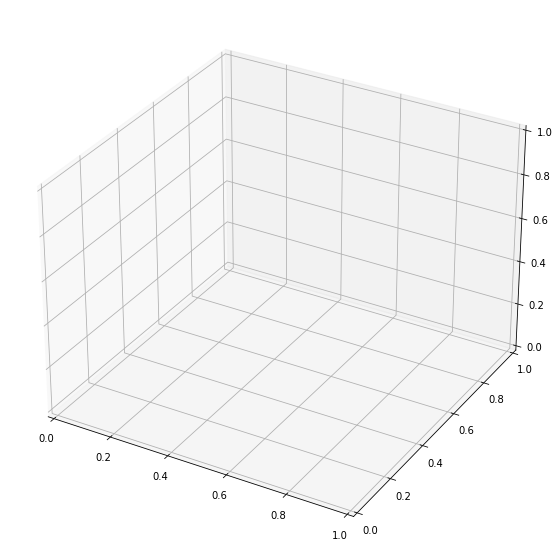

In [3]:
grid = Grid3D(1)

In [4]:
allcoords = [(0.49320663459993364, 0.9389111569776311, 0.6829714510506826),
 (0.10551251248149807, 0.2512711080303158, 0.6747291101069357),
 (0.8650122172493359, 0.35444103048241515, 0.3632397154292053),
 (0.6365643468040941, 0.8866680305501337, 0.41017472209212813),
 (0.40022029387615565, 0.5089075476696282, 0.16272787251517096),
 (0.2352484178214399, 0.8143095661213621, 0.6457479123344517),
 (0.8751054532504221, 0.5210131964071404, 0.7372040411075942),
 (0.5676743699909982, 0.7264292370238802, 0.8647781293692016),
 (0.7885655788796513, 0.5568896279616892, 0.7718613294819482),
 (0.8336968158759552, 0.6003622829241243, 0.12278559639670383)]

In [40]:
[f"{coords[0]:.2f}, {coords[1]:.2f}, {coords[2]:.2f}" for coords in allcoords]

['0.49, 0.94, 0.68',
 '0.11, 0.25, 0.67',
 '0.87, 0.35, 0.36',
 '0.64, 0.89, 0.41',
 '0.40, 0.51, 0.16',
 '0.24, 0.81, 0.65',
 '0.88, 0.52, 0.74',
 '0.57, 0.73, 0.86',
 '0.79, 0.56, 0.77',
 '0.83, 0.60, 0.12']

In [5]:
allcolour = ['pink', 'r','orange','y','c','g','blue','b','purple','gray']
particles = [Particle(grid, 2,coords, colour) for coords,colour in zip(allcoords,allcolour)]
[particle.colour for particle in grid.particles]

In [ ]:
# creating extra particles
# nextra = 10
# extra_coords = [np.random.random(2) + 10 for i in range(nextra)]
# extra_q = np.random.random(nextra)*20 - 10 +20
# for coords, q in zip(extra_coords, extra_q):
#     Particle(grid, coords, q)

In [ ]:
x, y = zip(*grid.get_all_coords())
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents

# Calculate the point density
xy = np.vstack([x,y])
z = scipy.stats.gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(x, y, c=z, s=20, cmap = 'cividis_r')
plt.show()

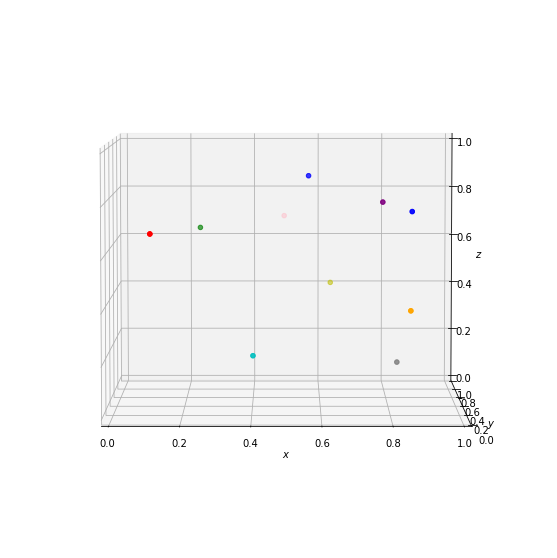

In [43]:
grid.ax.view_init(5, 270)
grid.fig

In [1]:
def replace_str(text, find, replace):
    for f, r in zip(find, replace):
        text =  text.replace(f, r)
    return text